In [132]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
import re
from nltk.corpus import stopwords
import ssl
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [133]:
# Part 1A)

df = pd.read_csv('Tweets.csv')

df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [134]:
print(f"Total rows in the dataset are: {len(df)}\n")

null_counts = df.isnull().sum()
print(null_counts)




Total rows in the dataset are: 14640

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [135]:
# Since airline_sentiment_gold, negativereason_gold and tweet_coord have almost all null values,
# removing all of these columns from the dataset.

columns_to_drop = ['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord', 'name', 'tweet_id']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

null_counts = df.isnull().sum()
print(null_counts)

airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  5462
negativereason_confidence       4118
airline                            0
retweet_count                      0
text                               0
tweet_created                      0
tweet_location                  4733
user_timezone                   4820
dtype: int64


In [136]:
# Replacing the negativereason, tweet_location, 'user_timezone' null values with empty string and negativereason_confidence null values with 0
df['negativereason'] = df['negativereason'].fillna('')
df['negativereason_confidence'] = df['negativereason_confidence'].fillna(0)
df['tweet_location'] = df['tweet_location'].fillna("")
df['user_timezone'] = df['user_timezone'].fillna("")

null_counts = df.isnull().sum()
print(null_counts)

airline_sentiment               0
airline_sentiment_confidence    0
negativereason                  0
negativereason_confidence       0
airline                         0
retweet_count                   0
text                            0
tweet_created                   0
tweet_location                  0
user_timezone                   0
dtype: int64


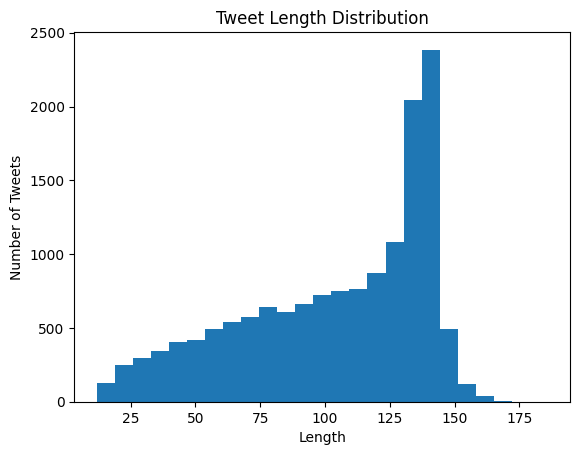

In [137]:
# Tweet length exploration
tweetLen = df['text'].str.len()

plt.hist(tweetLen, bins=25)
plt.title("Tweet Length Distribution")
plt.xlabel("Length")
plt.ylabel("Number of Tweets")
plt.show()



In [138]:
num_classes = df['airline_sentiment'].unique()

print(f"The different classification of the target are as follows: \n {num_classes}")

value_counts = df['airline_sentiment'].value_counts()

print(f"Number of tweets in each class are as follows: \n {value_counts}")


The different classification of the target are as follows: 
 ['neutral' 'positive' 'negative']
Number of tweets in each class are as follows: 
 airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64


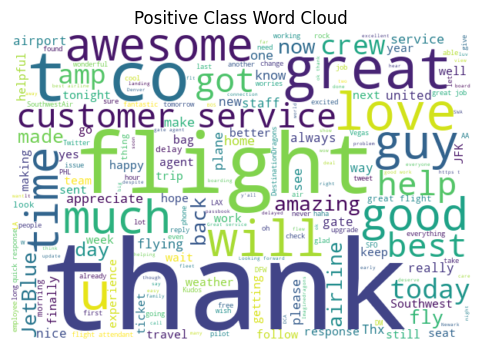

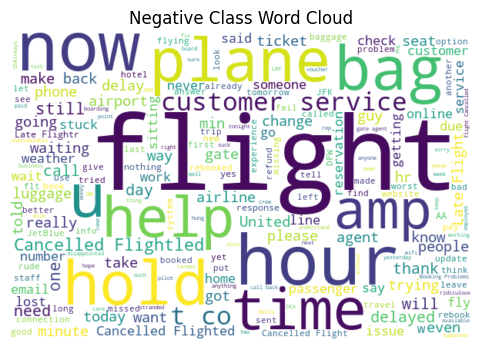

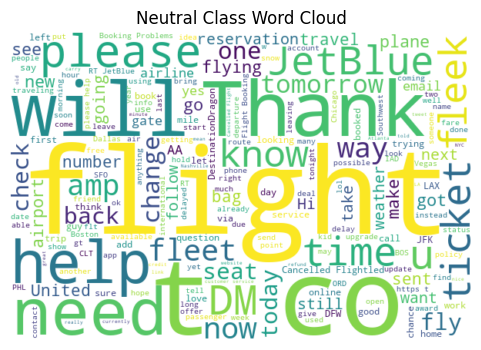

In [139]:
# Word clouds per class

def remove_words(text, words_to_remove):
    return ' '.join([word for word in text.split() if word.lower() not in words_to_remove])

positive_text = " ".join(df[df['airline_sentiment'] == 'positive']['text'])
negative_text = " ".join(df[df['airline_sentiment'] == 'negative']['text'])
neutral_text = " ".join(df[df['airline_sentiment'] == 'neutral']['text'])

words_to_remove = {'@united', '@jetblue', '@southwestair', '@usairways', '@americanair', '@virginamerica'} 

for label, text in [('Positive', positive_text), ('Negative', negative_text), ('Neutral', neutral_text)]:

    new_text = remove_words(text, words_to_remove)
    wc = WordCloud(width=600, height=400, background_color='white').generate(new_text)
    plt.figure(figsize=(6, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{label} Class Word Cloud')
    plt.show()

In [140]:
tweets = df['text']

words = " ".join(tweets).lower().split()
word_counts = Counter(words)

print(word_counts)
print("\n")

n = 20
most_common_words = word_counts.most_common(n)

print("Top", n, "words are:", most_common_words)

Counter({'to': 8590, 'the': 6034, 'i': 5351, 'a': 4461, 'for': 3964, '@united': 3760, 'and': 3693, 'on': 3652, 'you': 3607, 'my': 3272, 'flight': 3217, '@usairways': 2938, '@americanair': 2885, 'is': 2770, 'in': 2446, '@southwestair': 2389, 'of': 2109, '@jetblue': 2023, 'your': 1731, 'have': 1621, 'was': 1592, 'it': 1569, 'me': 1566, 'with': 1495, 'not': 1479, 'at': 1478, 'that': 1357, 'no': 1357, 'get': 1329, 'this': 1274, 'but': 1211, 'be': 1185, 'from': 1184, 'can': 1092, 'are': 1079, 'cancelled': 1047, 'we': 1024, 'an': 983, 'just': 956, 'been': 864, 'so': 848, 'do': 808, 'now': 759, 'will': 731, 'customer': 707, 'thanks': 705, 'our': 690, 'they': 687, 'service': 687, "i'm": 683, '-': 658, 'when': 647, 'what': 634, '&amp;': 632, 'how': 629, 'if': 613, 'up': 601, 'thank': 598, 'out': 597, '2': 591, 'us': 580, 'all': 560, 'still': 558, 'why': 558, 'time': 553, 'hold': 551, 'need': 546, 'would': 539, "can't": 515, 'flights': 510, 'one': 509, 'help': 509, 'about': 500, 'hours': 495, '@

In [141]:
#Question 1C)

_create_unverified_https_context = ssl._create_unverified_context
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dipeshpaneru/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dipeshpaneru/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/dipeshpaneru/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dipeshpaneru/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:



def cleanTweet(text):
    text = text.lower()                                          #Lowercasing text

    text = re.sub(r'[^a-z\s]', '', text)                         #Removing all other symbols

    tokens = word_tokenize(text)                                 #Tokenizing text

    stop_words = stopwords.words('english') 

    tokens = [x for x in tokens if x not in stop_words]          #Removing common words from tokens

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]     #Lammetizing the tokens

    return tokens



df['tokens'] = df['text'].apply(lambda x: cleanTweet(x))
df['tokens_text'] = df['tokens'].apply(lambda tokens: ' '.join(tokens))

vectorizer = TfidfVectorizer()
X_tf_idf= vectorizer.fit_transform(df['tokens_text'])           #TF-IDF representation



vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['tokens_text'])             #Bag of words representation





<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 7 stored elements and shape (1, 13486)>
  Coords	Values
  (0, 12812)	1
  (0, 9388)	1
  (0, 13441)	1
  (0, 140)	1
  (0, 2102)	1
  (0, 3709)	1
  (0, 11715)	1
